In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
X, Y = make_blobs(
    n_samples=500,
    n_features=2,
    centers = 2,
    random_state =100)

In [6]:
print(X.shape, Y.shape)

(500, 2) (500,)


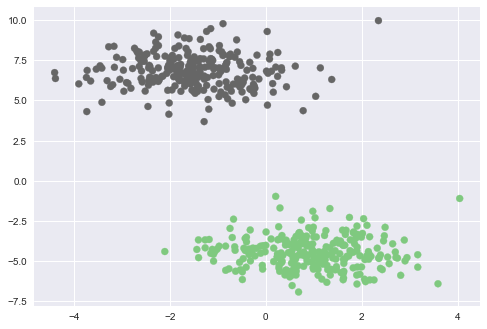

In [7]:
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1],  c = Y, cmap = plt.cm.Accent)
plt.show()

## Perceptron Learning Algorithm

- Learn the weights
- Reduce the loss
- Make predictions

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def predict(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    
    return predictions 

In [10]:
def loss(X, Y, weights):
    Y_ = predict(X, weights)
    
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    
    
    return cost


In [11]:
def update(X, Y, weights, learningRate):
    Y_ = predict(X, weights)
    
    dw = np.dot(X.T, Y_-Y)
    
    m = X.shape[0]
    
    weights = weights - learningRate*dw/(float(m))
    
    return weights

In [18]:
 def train(X, Y, learningRate = 0.5, maxEpochs = 1000):
        
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones, X))
        
        weights = np.zeros(X.shape[1])
        
        for epoch in range(maxEpochs):
            weights = update(X, Y, weights, learningRate)
            
            if epoch%10==0:
                l = loss(X,Y, weights)
                
                print("epochs %d Loss %.4f"%(epoch,l))
                
        return weights

In [24]:
weights = train(X,Y)

epochs 0 Loss 0.0024
epochs 10 Loss 0.0022
epochs 20 Loss 0.0020
epochs 30 Loss 0.0019
epochs 40 Loss 0.0018
epochs 50 Loss 0.0016
epochs 60 Loss 0.0016
epochs 70 Loss 0.0015
epochs 80 Loss 0.0014
epochs 90 Loss 0.0013
epochs 100 Loss 0.0013
epochs 110 Loss 0.0012
epochs 120 Loss 0.0012
epochs 130 Loss 0.0011
epochs 140 Loss 0.0011
epochs 150 Loss 0.0011
epochs 160 Loss 0.0010
epochs 170 Loss 0.0010
epochs 180 Loss 0.0010
epochs 190 Loss 0.0009
epochs 200 Loss 0.0009
epochs 210 Loss 0.0009
epochs 220 Loss 0.0009
epochs 230 Loss 0.0008
epochs 240 Loss 0.0008
epochs 250 Loss 0.0008
epochs 260 Loss 0.0008
epochs 270 Loss 0.0008
epochs 280 Loss 0.0008
epochs 290 Loss 0.0007
epochs 300 Loss 0.0007
epochs 310 Loss 0.0007
epochs 320 Loss 0.0007
epochs 330 Loss 0.0007
epochs 340 Loss 0.0007
epochs 350 Loss 0.0007
epochs 360 Loss 0.0006
epochs 370 Loss 0.0006
epochs 380 Loss 0.0006
epochs 390 Loss 0.0006
epochs 400 Loss 0.0006
epochs 410 Loss 0.0006
epochs 420 Loss 0.0006
epochs 430 Loss 0.0006

In [25]:
def getPredictions(xTest, weights, labels = True):
    if xTest.shape[1] != weights.shape[0]:
        ones = np.ones((xTest.shape[0],1))
        
        xTest = np.hstack((ones, xTest))
        
    
    probs = predict(xTest, weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>0.5] = 1
        
        return labels

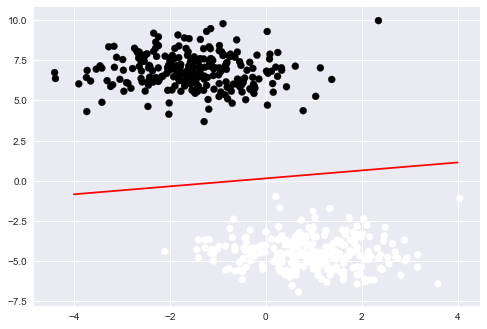

In [29]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.plot(x1,x2, c = 'red')
plt.show()

In [27]:
x1 = np.linspace(-4,4,10)

x2 = -(weights[0]+weights[1]*x1)/weights[2]